In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('amazon.csv', encoding="iso-8859-1", parse_dates=['date'])

In [7]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

# 1.Display Top 5 rows Of Dataset...

In [5]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# 2.Check Last 5 Rows Of Dataset...

In [8]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# 3.Find Shape Of Our Dataset...

In [9]:
data.shape

(6454, 5)

# Getting The Information Of Our Dataset...

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


# 5.Check For Duplicate Data and Drop Them...

In [11]:
dup_data = data.duplicated().any()

In [13]:
print("Are There Any Duplicated Values In Data:", dup_data)

Are There Any Duplicated Values In Data: True


In [14]:
data = data.drop_duplicates()

In [15]:
data.shape

(6422, 5)

In [16]:
6454 - 6422

32

# 6.Check Null Values In The Dataset...

In [18]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# 7.Get Overall Statistics About Our Dataset...

In [20]:
data.describe(include='all',datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


# 8.Rename Month Name To English...

In [29]:
data['month_new'] = data['month'].map({'Janeiro':'jan',
                                        'Fevereiro':'feb',
                                        'Marco':'march',
                                        'Abril':'april',
                                        'Maio':'may',
                                        'Junho':'jun',
                                        'Julho':'july',
                                        'Agosto':'august',
                                        'Setembro':'sept',
                                        'Outubro':'oct',
                                        'Novembro':'nov',
                                        'Dezembreo':'Dec'})

In [30]:
data

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,NaN
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,NaN
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,NaN
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,NaN


# 9.Total Number Of Fires Registred...

In [31]:
data.shape

(6422, 6)

# 10.In Which Month Maximum Number Of Forest Fires Were Reported...

In [32]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [35]:
data1 = data.groupby('month_new')['number'].sum().reset_index()
data1

,month_new,number
0,april,28184.770
1,august,88050.435
2,feb,30839.050
3,jan,47681.844
4,july,92319.113
5,jun,55997.675
6,may,34725.363
7,nov,85508.054
8,oct,88681.579
9,sept,58578.305


<function matplotlib.pyplot.show(close=None, block=None)>

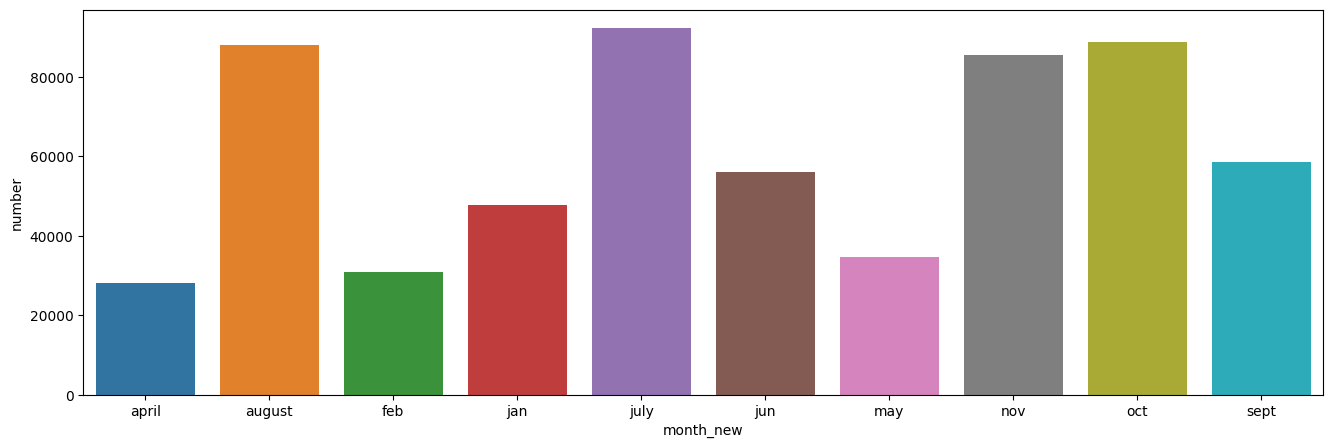

In [38]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_new",y="number", data=data1)
plt.show

# 11.In Which Year Maximum Number Of Forest Fires Were Reported...

In [39]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [40]:
data2 = data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<function matplotlib.pyplot.show(close=None, block=None)>

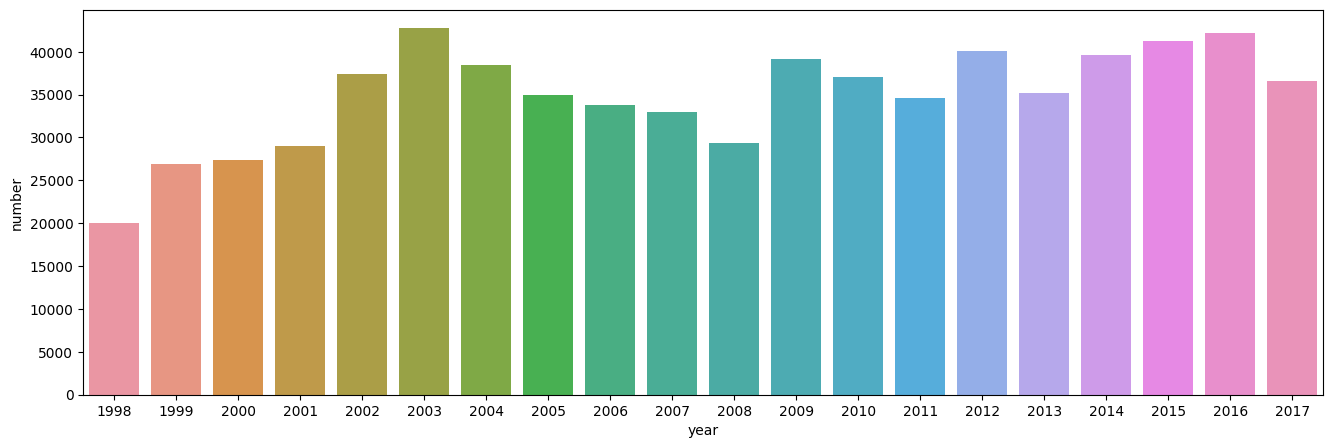

In [41]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number", data=data2)
plt.show

# 12.In Which States Maximum Number Of Forest Fires Were Reported...

In [42]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [46]:
data3 = data.groupby('state')['number'].sum().reset_index().head(10)
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<function matplotlib.pyplot.show(close=None, block=None)>

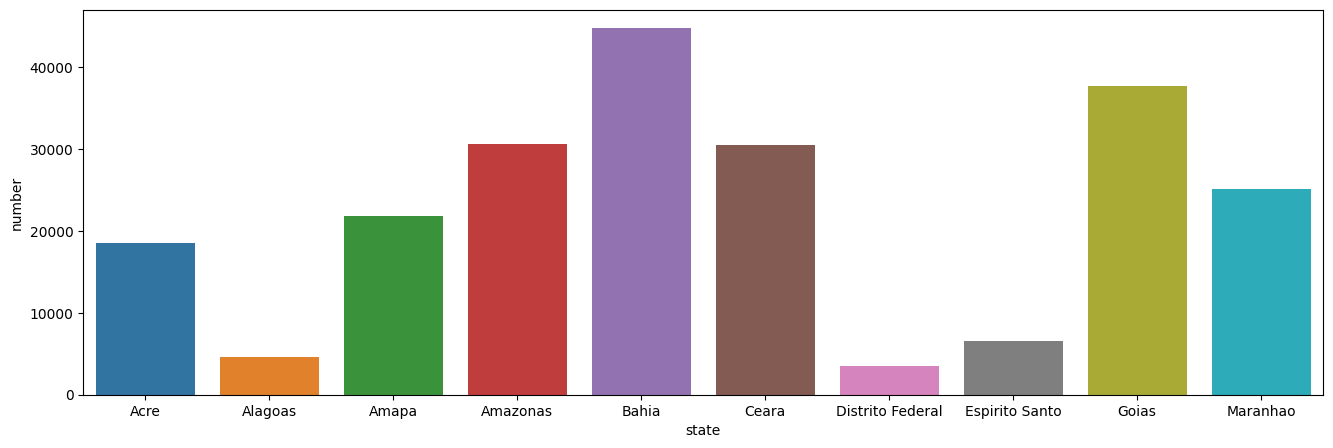

In [47]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number", data=data3)
plt.show

# 13.Find The Total Number Of Fires Were Reported In Amazonas...

In [48]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [54]:
data[data['state'] == 'Amazonas']['number'].sum()

30650.129

# 14.Display Number Of Fires Were Reported In Amazonas(Year-Wise)...

In [55]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [59]:
data4 = data[data['state'] == "Amazonas"]
data4

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,NaN
953,2013,Amazonas,Dezembro,236.0,2013-01-01,NaN
954,2014,Amazonas,Dezembro,293.0,2014-01-01,NaN
955,2015,Amazonas,Dezembro,565.0,2015-01-01,NaN


In [61]:
data5 = data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


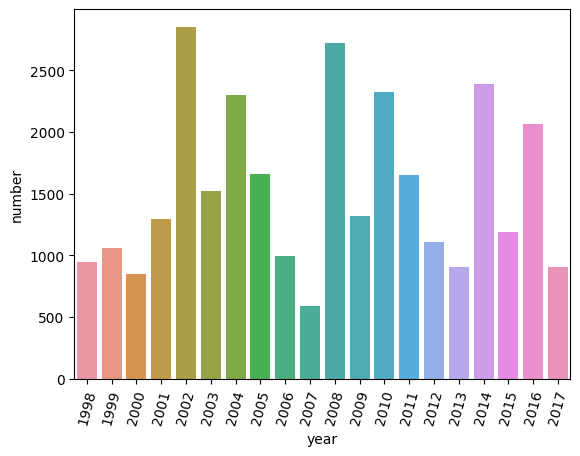

In [63]:
sns.barplot(x="year", y="number", data=data5)
plt.xticks(rotation = 75)
plt.show()

# 15.Display The Number Of Fires Were Reported In Amazonas(Day-Wise)

In [64]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [66]:
data6 = data[data['state'] == "Amazonas"]
data6

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,NaN
953,2013,Amazonas,Dezembro,236.0,2013-01-01,NaN
954,2014,Amazonas,Dezembro,293.0,2014-01-01,NaN
955,2015,Amazonas,Dezembro,565.0,2015-01-01,NaN


In [74]:
day = data6.groupby(data6['date'].dt.dayofweek).sum().number
import calendar
day.index = [calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()
day

C:\Users\Praveen Kamble\AppData\Local\Temp\ipykernel_10668\3213669152.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day = data6.groupby(data6['date'].dt.dayofweek).sum().number


,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


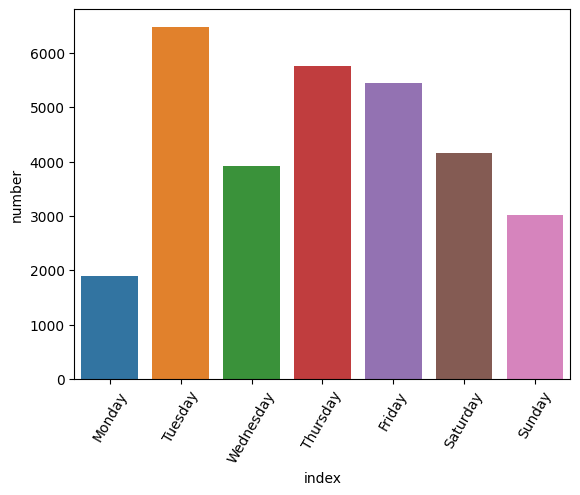

In [77]:
sns.barplot(x="index", y ="number",data=day)
plt.xticks(rotation=60)
plt.show()

# 16.Find Total Number Of Fires Were Reported In 2015 & Visualize Data Based On Each Month...

In [78]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [84]:
fire = data[data['year'] == 2015].groupby('month_new')['number'].sum().reset_index()

In [85]:
fire

,month_new,number
0,april,2573.000
1,august,4363.125
2,feb,2309.000
3,jan,4635.000
4,july,4364.392
5,jun,3260.552
6,may,2384.000
7,nov,4034.518
8,oct,4499.525
9,sept,2494.658


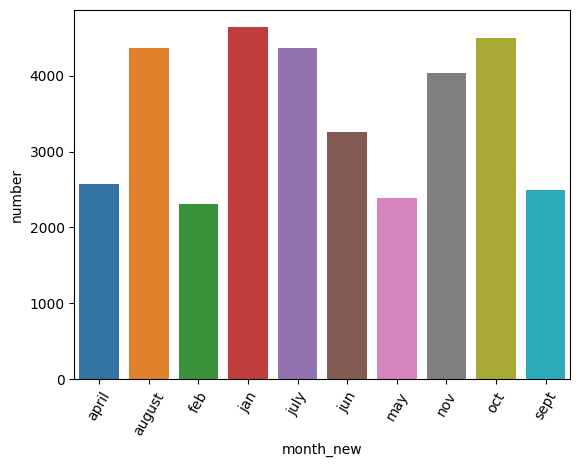

In [87]:
sns.barplot(x="month_new",y="number",data=fire)
plt.xticks(rotation=60)
plt.show()

# 17. Find Average Number Of Fires Were Reported From Highest To Lowest(State-Wise)

In [88]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [92]:
data8 = data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [93]:
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


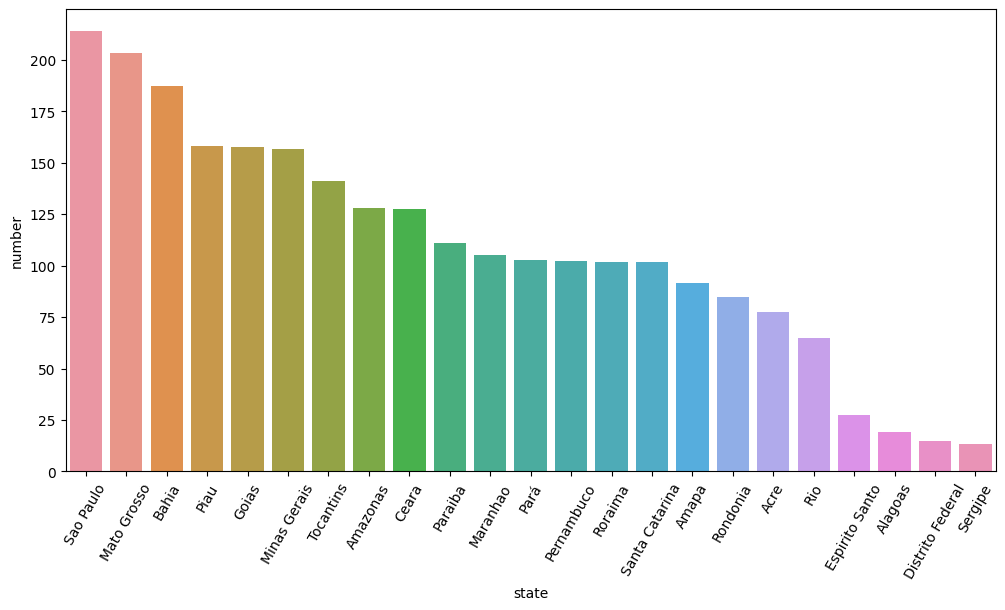

In [95]:
plt.figure(figsize=(12,6))
sns.barplot(x="state",y='number', data=data8)
plt.xticks(rotation=60)
plt.show()

# 18.To Find The State Names Where Fires Were Reported In 'dec' Month...

In [96]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [103]:
data[data['month_new'] == "jan"]['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)